## Assignment 0
 **Each one of the datasets has properties which makes
them hard to learn. Motivate which of the three problems is most
difficult for a decision tree algorithm to learn.**


Monk1 : (a1 = a2) V (a5 = 1), Best Case 1, Worst Case 2

Monk2 : ai = 1 for exacly two i ∈ {1, 2, . . . , 6}, Best Case = Worst Case 6

Monk3 : (a5 = 1 ∧ a4 = 1) ∨ (a5 != 4 ∧ a2 != 3), Best Case 2, Worst Case 4

The dataset with higher worst case is the most difficult tree to learn for a decision tree algorithm.

## Assignment 1
**Calculate the entropy of the training
datasets.**

In [1]:
import monkdata as m
import dtree

In [2]:
entropy1 = dtree.entropy(m.monk1)
entropy2 = dtree.entropy(m.monk2)
entropy3 = dtree.entropy(m.monk3)

print(entropy1)
print(entropy2)
print(entropy3)

1.0
0.957117428264771
0.9998061328047111


## Assignment 2
**Explain entropy for a uniform distribution and a
non-uniform distribution, present some example distributions with
high and low entropy.**


Uniform (least informative distribution) -> Maximized entropy -> 1.0

Non Uniform -> != 1.0

In an uniform distribution, all the datapoints have the same probability so we have no clue about the outcome, and thus maximum entropy. In a non uniform distribution some datapoints have higher probability than others, so we can estimate a possible outcome which implies lower entropy.

*Examples:*

High Entropy: [ 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4 ]

Low Entropy: [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, ]

## Assignment 3
**Use the function averageGain (defined in dtree.py)
to calculate the expected information gain corresponding to each of
the six attributes. Note that the attributes are represented as instances of the class Attribute (defined in monkdata.py) which you
can access via m.attributes[0], ..., m.attributes[5]. Based on
the results, which attribute should be used for splitting the examples
at the root node?**

In [3]:
import pandas as pd
num_attributes = len(m.attributes)

In [4]:
gain_monk1 = [ dtree.averageGain(m.monk1,m.attributes[i]) for i in range(num_attributes) ]
gain_monk2 = [ dtree.averageGain(m.monk2,m.attributes[i]) for i in range(num_attributes) ]
gain_monk3 = [ dtree.averageGain(m.monk3,m.attributes[i]) for i in range(num_attributes) ]

pd.DataFrame([gain_monk1, gain_monk2, gain_monk3], columns=["a1", "a2", "a3", "a4", "a5", "a6"], index=["monk1", "monk2", "monk3"])

,a1,a2,a3,a4,a5,a6
monk1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
monk2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
monk3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


**Based on the results, which attribute should be used for splitting the examples
at the root node?**

In [5]:
max1 = gain_monk1.index(max(gain_monk1))
max2 = gain_monk2.index(max(gain_monk2))
max3 = gain_monk3.index(max(gain_monk3))

print("Monk1: ", gain_monk1.index(max(gain_monk1))+1, max(gain_monk1))
print("Monk2: ", gain_monk2.index(max(gain_monk2))+1, max(gain_monk2))
print("Monk3: ", gain_monk3.index(max(gain_monk3))+1, max(gain_monk3))

Monk1:  5 0.28703074971578435
Monk2:  5 0.01727717693791797
Monk3:  2 0.29373617350838865


## Assignment 4
**For splitting we choose the attribute that maximizes
the information gain, Eq.3. Looking at Eq.3 how does the entropy of
the subsets, Sk, look like when the information gain is maximized?
How can we motivate using the information gain as a heuristic for
picking an attribute for splitting? Think about reduction in entropy
after the split and what the entropy implies.**

The Entropy of the subsets S_k should be minimum when the information gain is maximized, because we need the subsets to be as compact as possible and so their randomness should be minimum. 

Max IG => minimum entropy for each subset S_k => Good division of dataset. 

## Assignment 5

In [6]:
import drawtree_qt5 as d

**Split the monk1 data into subsets according to the selected attribute using
the function select (again, defined in dtree.py) and compute the information gains for the nodes on the next level of the tree.**

In [7]:
monk1_subsets = [ dtree.select(m.monk1,m.attributes[max1],i) for i in m.attributes[max1].values ]
gain_monk1_subsets = [ 
        [  dtree.averageGain(monk1_subsets[i], m.attributes[j]) 
             for j in range(num_attributes) 
        ] 
        for i in range(len(monk1_subsets))
]
pd.DataFrame(gain_monk1_subsets, columns=["a1", "a2", "a3", "a4", "a5", "a6"], index=["a5=1", "a5=2", "a5=3", "a5=4"])

,a1,a2,a3,a4,a5,a6
a5=1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
a5=2,0.040217,0.015063,0.037273,0.048892,0.0,0.025807
a5=3,0.033055,0.002197,0.017982,0.019123,0.0,0.045109
a5=4,0.206291,0.033898,0.025906,0.075933,0.0,0.003324


**Which attributes should be tested for these nodes?**

For the subset a5=1 all the samples belongs to the same class (True) so the information gain is 0 and it is not necessary to branch more.

In [8]:
max_sub1 = [ gain_monk1_subsets[i].index(max(gain_monk1_subsets[i]))+1 for i in range(1, len(monk1_subsets))]
pd.Series(max_sub1, index=["a2", "a3", "a4"])

a2    4
a3    6
a4    1
dtype: int64

In [9]:
most_commons = [ dtree.mostCommon(monk1_subsets[i]) for i in range(len(monk1_subsets)) ]
print(most_commons)

comp_t = dtree.buildTree(m.monk1,m.attributes, 1)

print(comp_t)

#DRAW TREE
#d.drawTree(comp_t)

[True, False, False, False]
A5(+---)


**Build the full decision trees for all three Monk
datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and
test datasets.**

In [10]:
t1=dtree.buildTree(m.monk1,m.attributes)
t2=dtree.buildTree(m.monk2,m.attributes)
t3=dtree.buildTree(m.monk3,m.attributes)

pd.DataFrame(
    [[1-dtree.check(t1, m.monk1), 1-dtree.check(t1, m.monk1test)], 
     [1-dtree.check(t2, m.monk2), 1-dtree.check(t2, m.monk2test)],
     [1-dtree.check(t3, m.monk3), 1-dtree.check(t3, m.monk3test)]
    ],    
    columns=["Err. Train", "Err. Test"],
    index=["monk1", "monk2", "monk3"]
)

,Err. Train,Err. Test
monk1,0.0,0.171296
monk2,0.0,0.307870
monk3,0.0,0.055556


**Compute the train and test set errors for the three Monk datasets
for the full trees. Were your assumptions about the datasets correct?
Explain the results you get for the training and test datasets.**

We assumed that monk3 has lowest error because of the 5% introduced noise, that led the model to generalize better to the test set.

We were expecting that the hierarchy of error would be:
1-Monk2: it needed 6 questions in the best and worst case
2-Monk3: it needed 4 questions in the worst case and 2 questions in the best case
3-Monk1: it needed 2 questions in the worst case and 1 question in the best case 

Results showed that Monk3 has the least error, and we assume that is the case because of the introduced noise.
So as the hierarchy follows, Monk2 had the highest error, and then Monk1 followed.

For the training and testing results:
The training set will generally result in lower error (0.0 in this case) since we used it to train the model initially, and the model already saw the data.
Vice versa, the test set is the new unseen data and the model will result in higher error on it.

## Assignment 6
**Write code which performs the complete pruning by repeatedly calling
allPruned and picking the tree which gives the best classification performance on the validation dataset. You should stop pruning when all the
pruned trees perform worse than the current candidate.**

In [11]:
import random

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

In [12]:

def bestTreeAfterPruning(train, val):
    current_tree = dtree.buildTree(train,m.attributes)
    current_acc = dtree.check(current_tree, val)
    #print("Error before pruning is:", 1-current_acc)

    list_trees = dtree.allPruned(current_tree)
    accuracies = [dtree.check(tree, val) for tree in list_trees]
    best_acc = max(accuracies)
    best_tree = list_trees[accuracies.index(best_acc)]

    while(current_acc < best_acc):
        best_acc=current_acc
        list_trees = dtree.allPruned(current_tree)
        accuracies = [dtree.check(tree, val) for tree in list_trees]
        current_acc = max(accuracies)
        best_tree = list_trees[accuracies.index(current_acc)]

    #print("Error afer pruning is:",1-current_acc)
    return best_tree

**Explain pruning from a bias variance trade-off perspective.**

Pruning a decision tree reduces the variance by removing unnecessary sections of the tree and thus reducing complexity of the model.  
Pruning tends to decrease bias as it selects the tree having best accuracy (lowest error).

## Assignment 7
**Evaluate the effect pruning has on the test error for
the monk1 and monk3 datasets, in particular determine the optimal
partition into training and pruning by optimizing the parameter
fraction. Plot the classification error on the test sets as a function
of the parameter fraction ∈ {0.3, 0.4, 0.5, 0.6, 0.7, 0.8}.**


In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [14]:
list1_avg = [] # y-axis for monk1 avg
list3_avg = [] # y-axis for monk3 avg
list1_std = [] # y-axis for monk1 std
list3_std = [] # y-axis for monk3 std

list_fractions1 = []
list_fractions3 = []

fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8] # fractions on x-axis

for fraction in fractions:
    #print("\nFor Monk1 dataset with fraction ", fraction, ":")
    
    for i in range(1000):
        monk1train, monk1val = partition(m.monk1, fraction)
        list_fractions1.append(1-dtree.check(bestTreeAfterPruning(monk1train, monk1val), m.monk1test))
    avg = np.mean(list_fractions1)
    std = np.std(list_fractions1)
    list1_avg.append(avg)
    list1_std.append(std)
    
    #print("\nFor Monk3 dataset with fraction ", fraction, ":")
    for i in range(1000):
        monk3train, monk3val = partition(m.monk3, fraction)
        list_fractions3.append(1-dtree.check(bestTreeAfterPruning(monk3train, monk3val), m.monk3test))
    avg = np.mean(list_fractions3)
    std = np.std(list_fractions3)
    list3_avg.append(avg)
    list3_std.append(std)

    
    list_fractions1 = []
    list_fractions3 = []

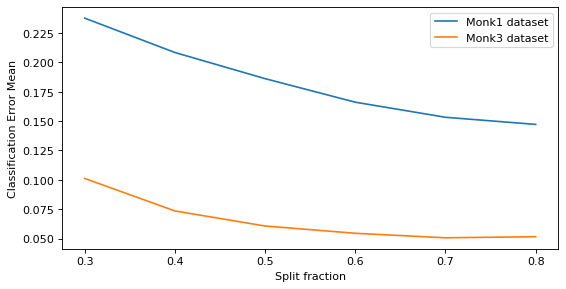

In [15]:
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fractions,list1_avg,label='Monk1 dataset')
plt.plot(fractions,list3_avg,label='Monk3 dataset')
plt.legend()
plt.xlabel("Split fraction")
plt.ylabel("Classification Error Mean")
plt.show()

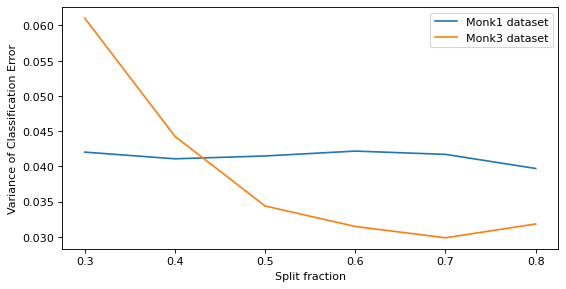

In [16]:
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fractions,list1_std,label='Monk1 dataset')
plt.plot(fractions,list3_std,label='Monk3 dataset')
plt.legend()
plt.xlabel("Split fraction")
plt.ylabel("Variance of Classification Error")
plt.show()

In both datasets the average error is decreasing when increasing the split fraction, so chosing a fraction of 0.8 will be ok. For the variance, both classification errors have a low variance, thus the error is close to some particular mean (not highly spread).

## Assignment 7 with Seed
Using random with a fixed seed

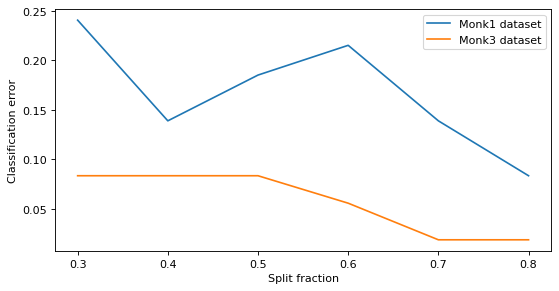

In [17]:
def partitionWithSeed(data, fraction):
    random.seed(50)
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

list1_seed = [] # y-axis for monk1
list3_seed = [] # y-axis for monk3

fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8] # fractions on x-axis

for fraction in fractions:
    #print("\nFor Monk1 dataset with fraction ", fraction, ":")
    monk1train_seed, monk1val_seed = partitionWithSeed(m.monk1, fraction)
    list1_seed.append(1-dtree.check(bestTreeAfterPruning(monk1train_seed, monk1val_seed), m.monk1test))
    
    #print("\nFor Monk3 dataset with fraction ", fraction, ":")
    monk3train_seed, monk3val_seed = partitionWithSeed(m.monk3, fraction)
    list3_seed.append(1-dtree.check(bestTreeAfterPruning(monk3train_seed, monk3val_seed), m.monk3test))

figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fractions,list1_seed,label='Monk1 dataset')
plt.plot(fractions,list3_seed,label='Monk3 dataset')
plt.legend()
plt.xlabel("Split fraction")
plt.ylabel("Classification error")
plt.show()

For monk3 a partition fraction of 0.7 would be optimal because we can notice that the error stabilizes after 0.7 (remains constant).
For monk1 a faction of 0.8 is optimal because the classification error is minimum.